In [42]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import matplotlib.animation as animation
from tqdm import tqdm

In [43]:
def f2(x,y):
    return x**4 + y**4 - 2*(x-y)**2
    
Dx = lambda f,x,y,h=1e-5: (f(x+h,y) - f(x-h,y))/(2*h)
Dy = lambda f,x,y,h=1e-5: (f(x,y+h) - f(x,y-h))/(2*h)
x0, y0 = 0.,3.

In [44]:
Gradient = lambda f,x,y: np.array([Dx(f,x,y),Dy(f,x,y)])
Gradient(f2,x0,y0)

array([12., 96.])

In [45]:
def Minimizer(f, N, gamma = 0.01, eta = 0.6):
    
    r = np.zeros((N,2))
    r[0] = np.random.uniform(-5.,5.,size=2)
    r[0,0] = 0.
    r[0,1] = 3.
    Grad = np.zeros((N,2))
    Grad[0] = Gradient(f,r[0,0],r[0,1])
    
    for i in tqdm(range(1,N)):
        r[i] = r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1]) + eta*(r[i-2] - r[i-3])
        Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])
        
        
    return r,Grad

In [46]:
def Minimizer2(f, N, gamma = 0.01):
    
    r = np.zeros((N,2))
    r[0] = np.random.uniform(-5.,5.,size=2)
    r[0,0] = 0.
    r[0,1] = 3.
    Grad = np.zeros((N,2))
    Grad[0] = Gradient(f,r[0,0],r[0,1])
    
    for i in tqdm(range(1,N)):
        r[i] = r[i-1] - gamma*Gradient(f,r[i-1,0],r[i-1,1])
        Grad[i] = Gradient(f,r[i-1,0],r[i-1,1])
        
        
    return r,Grad



100%|██████████████████████████████████████████████████████████████████████████████| 149/149 [00:00<00:00, 4338.49it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

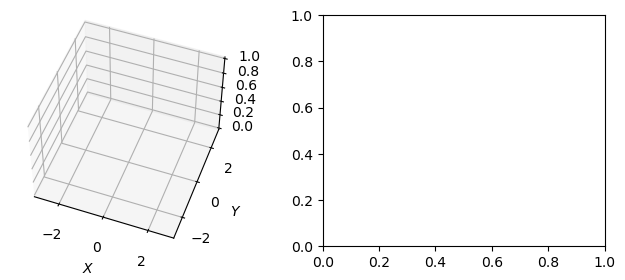

In [54]:
N = 150
r,Grad = Minimizer(f2,N)
r2, Grad2 = Minimizer2(f2,N)
r[-1]
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,2,1, projection = '3d',elev = 50, azim = -70)
ax1 = fig.add_subplot(1,2,2)

x = np.linspace(-3,3,100)
y = np.linspace(-3,3,100)
X,Y = np.meshgrid(x,y)
Z = f2(X,Y)

plt.show


In [48]:
def init():
    
    ax.set_xlim3d(x[0],x[-1])
    ax.set_ylim3d(y[0],y[-1])
    ax.set_xlabel(r'$X$')
    ax.set_ylabel(r'$Y$')

In [55]:
def Update(i):
    
    ax.clear()
    ax1.clear()
    init()
    
    ax.set_title(r'$N=%.0f, Cost=%.3f$'%(i,f2(r[i,0],r[i,1])))
    ax.plot_surface(X,Y,Z, cmap = 'coolwarm', alpha=0.4)
    ax.scatter(r[:i,0],r[:i,1],f2(r[:i,0],r[:i,1]),marker='.',color='r')
    ax.scatter(r2[:i,0],r2[:i,1],f2(r2[:i,0],r2[:i,1]),marker='.',color='b')
    
    ax1.contour(X,Y,f2(X,Y))
    ax1.scatter(r[i,0],r[i,1],color='r') 
    ax1.quiver(r[i,0],r[i,1],-Grad[i,0],-Grad[i,1],color='r')
    ax1.scatter(r2[i,0],r2[i,1],color='b')
    ax1.quiver(r2[i,0],r2[i,1],-Grad2[i,0],-Grad2[i,1],color='b')

In [56]:
Animation = animation.FuncAnimation(fig, Update, frames=N,init_func=init)
for i in range(len(r)):
    c = round(f2(r[i,0],r[i,1]), 3)
    if np.abs(c) == 8:
        print(i)
        break

45
